## 文章评论分析报告

总计文章 10 篇，评论 5111 条。  
主要对文章评论进行了两个方面的分析：
- 情感分析
- 关键词分析
  - 关键词权重分析
  - 关键词情感分析

__说明：在下面的分析与画图中，分别用 0~9 按如下文章列表顺序表示该文章。__

In [518]:
for i in range(len(xlsx_names)):
    print i,xlsx_names[i], len(reviews[i])

0 ./reviews/什么是靠谱的智力提升法.xlsx 219
1 ./reviews/别给孩子贴标签.xlsx 400
2 ./reviews/坚持这三步，搞定发脾气的娃.xlsx 976
3 ./reviews/大脑暗能量打开创造力.xlsx 886
4 ./reviews/孩子学外语，多大最合适.xlsx 371
5 ./reviews/孩子接受新事物比成年人快.xlsx 154
6 ./reviews/教你三招亲子游戏，玩着学外语.xlsx 116
7 ./reviews/电子设备，是洪水猛兽还是育儿助手.xlsx 486
8 ./reviews/让你的孩子享受最新脑科学研究成果.xlsx 976
9 ./reviews/运用三个方法，让孩子比你更聪明.xlsx 527


### 一，情感分析

__说明__：情感分析得到正负面情绪，尤其是__负面情绪__，在这 10 篇文章中并非针对文章本身。这是因为评论内容多为 __向作者的提问__和__对自身一些行为的反省__，所以这里的情绪是对评论者自己，或者自己的孩子的某些行为而言的。这点在对关键词的情感分析中有更好的体现。

从整体来看：
- 平均每篇文章有 511 条评论，其中正面 314 条，负面 196 条；
- 最多的评论 976 条，最多的正面评论 694 条，最多的负面评论 432 条；

其它描述性统计特征如下，pos，neg，sum，pos_per，neg_per 分别对应正面情绪数量、负面情绪数量、总计、正面情绪率、负面情绪率

In [521]:
df.describe()

,pos,neg,sum,pos_per,neg_per
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,314.300000,196.800000,511.100000,61.937136,38.062864
std,213.502563,138.498135,329.075287,10.275844,10.275844
min,86.000000,25.000000,116.000000,48.500000,21.551724
25%,156.500000,100.250000,257.000000,55.737705,34.413584
50%,251.500000,181.000000,443.000000,59.609321,40.390679
75%,493.750000,202.500000,796.250000,65.586416,44.262295
max,694.000000,432.000000,976.000000,78.448276,51.500000


下面的两张图表示每一篇文章的评论情况的和评论情感的整体分布。其中 2，8 篇最多；6 篇最少。第二张图表现评论情感整体的分布，正面情绪占大多数为 61.5%，负面情绪为 38.5%。分析评论来看，正面情绪多为感谢；负面情绪多为用户的提问，可以针对用户的提问来进一步挖掘用户的购买欲望，挖掘价值较大，这一部分主要在关键词的情感分析。

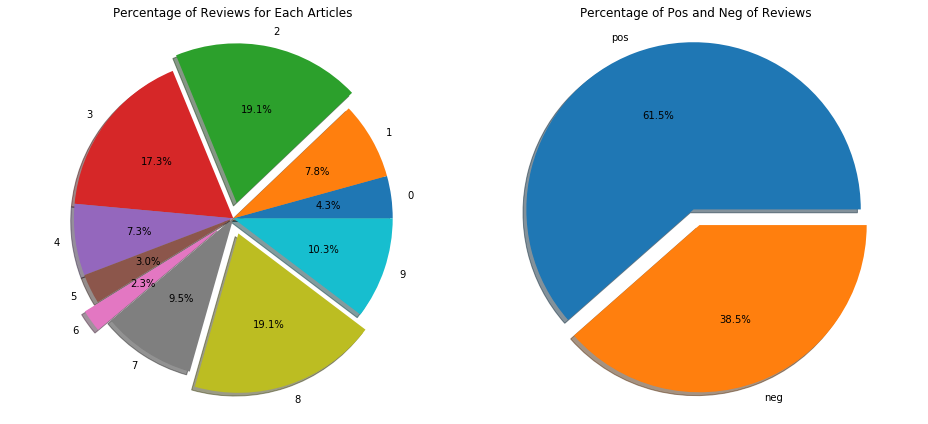

In [60]:
fig,axes = plt.subplots(1,2,figsize = (13,6))

axes[0].pie(df["sum"],labels = ["0","1","2","3","4","5","6","7","8","9"],autopct ='%1.1f%%',shadow = True,
            explode = [0,0,0.1,0,0,0,0.1,0,0.1,0] )

axes[1].pie([df["pos"].sum(),df["neg"].sum()],labels = ["pos","neg"],autopct='%1.1f%%',
             explode = [0,0.1],shadow = True)

axes[0].axis('equal')
axes[1].axis('equal')
axes[0].set_title("Percentage of Reviews for Each Articles")
axes[1].set_title("Percentage of Pos and Neg of Reviews")

fig.tight_layout()

下面两张图是每篇文章的情感和正负面情绪率的分布情况，几乎每篇文章中正面情绪都是要比负面情绪的评论要多，文章 1 除外。文章 1 是 _不要给孩子贴标签_, 很多人提到了自己在之前对孩子贴标签的行为，可见文章成功地引发了用户的思考，而且贴标签的行为在家长中较为普遍。另外，关于孩子情绪脾气方面的文章回复率，负面率较高，可见用户在这方面的疑惑较多。

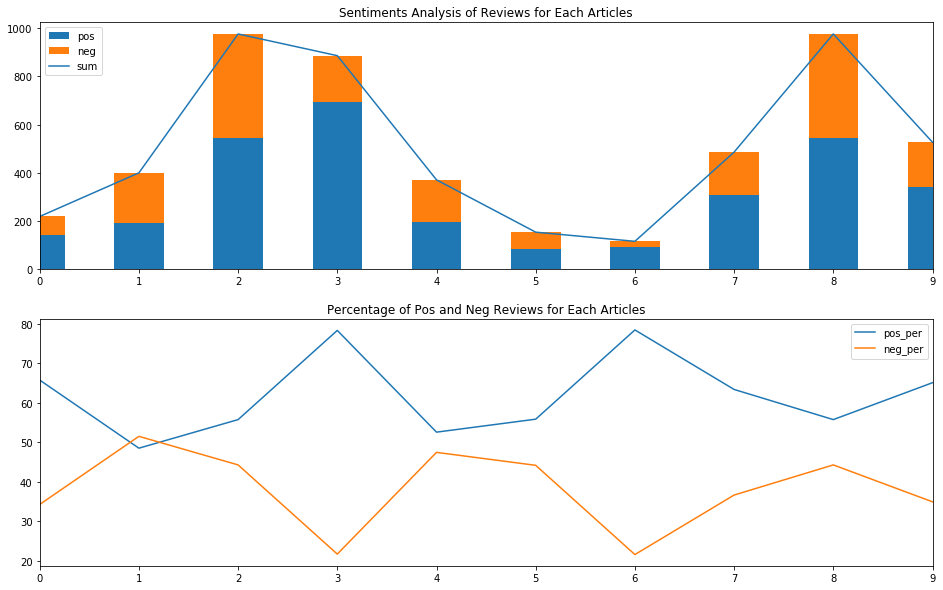

In [35]:
fig,axes = plt.subplots(2,1,figsize = (16,10))

df[["pos","neg"]].plot.bar(ax = axes[0],stacked = True,title ="Sentiments Analysis of Reviews for Each Articles");
df[["sum"]].plot(ax=axes[0])
df[["pos_per","neg_per"]].plot(ax=axes[1],title = "Percentage of Pos and Neg Reviews for Each Articles");

### 二， 关键词分析

### 关键词权重分析

评论的关键词分析重要针对的是每一篇文章而言，单个评论的关键词意义不大，如果需要提取意见，可以进一步文本聚类来实现。  
下图是每篇文章的关键词权重，显而易见孩纸是这 10 篇文章的权重最大的关键词，其次是老师以及该篇文章具体的小主题。所以，每篇文章下面的评论与文章内容是强烈的相关的。用户对文章的评论是由文章内容引发的对自己育儿过程中遇到问题的思考。

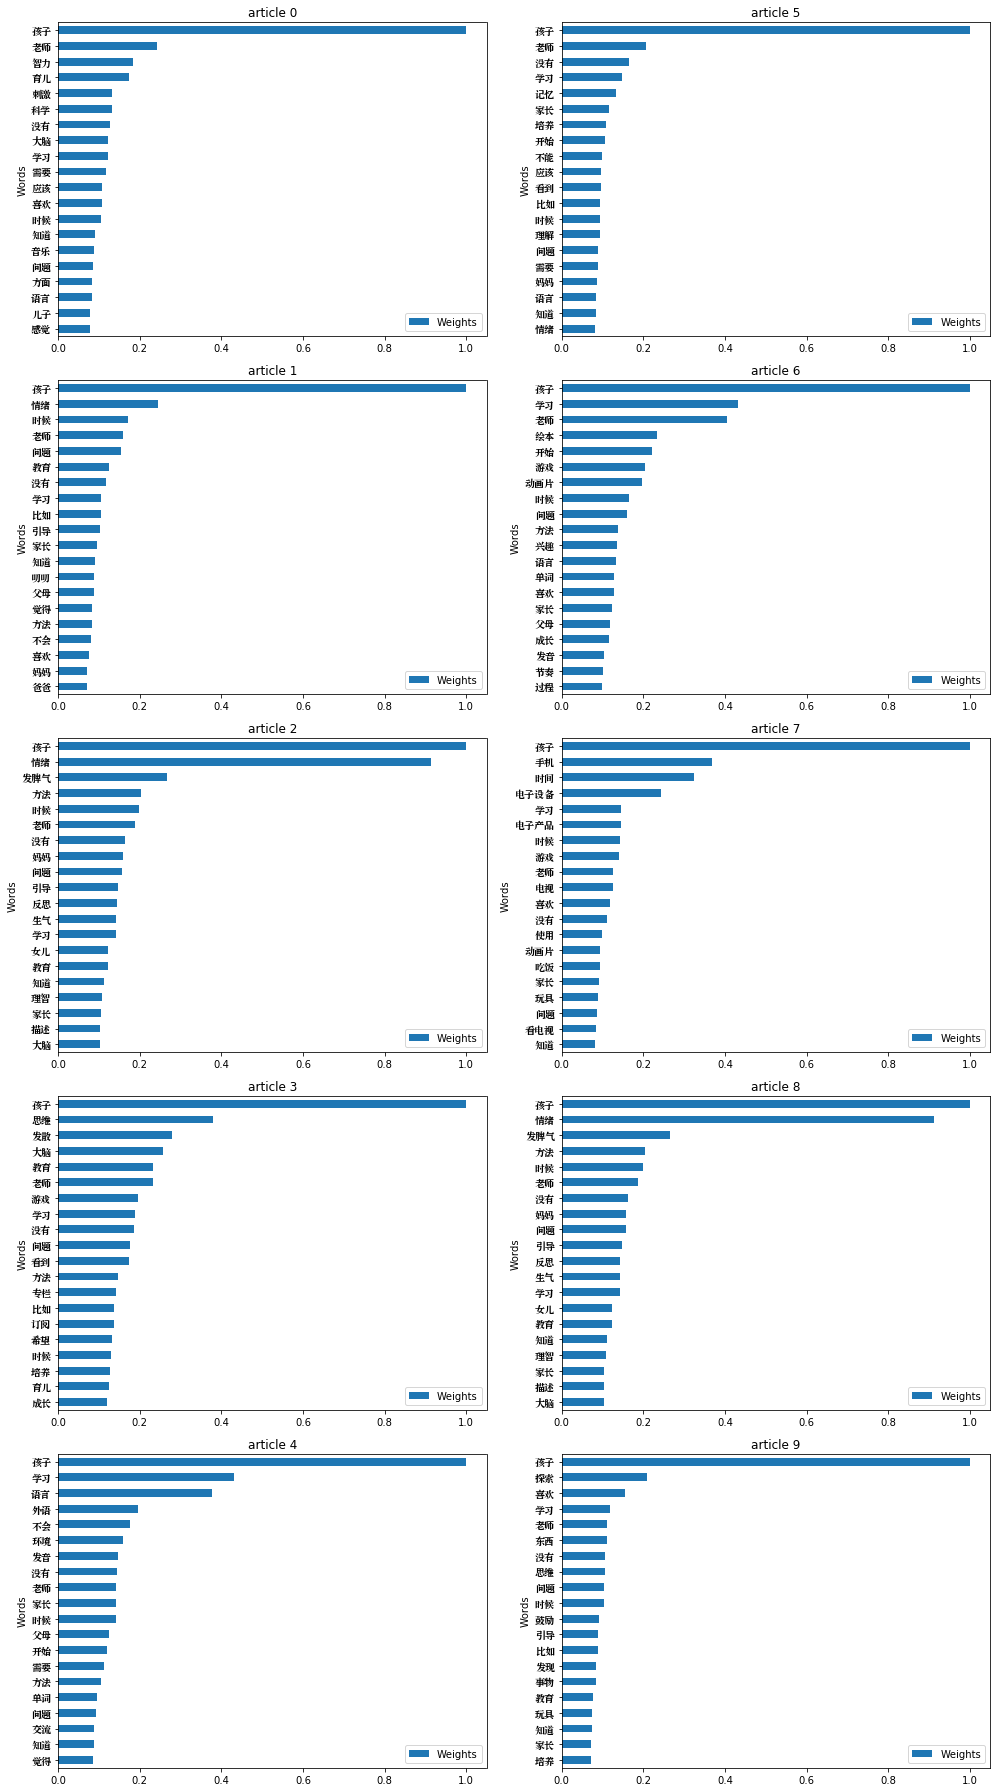

In [525]:
fig, axes = plt.subplots(5,2,figsize=(14,25))

for i in range(5):
    names["df_key_words_%s" %i][::-1].plot.barh(ax=axes[i][0])
    for label in axes[i][0].get_yticklabels(): 
        label.set_fontproperties(font) 
    axes[i][0].set_title("article %s"%i)

    names["df_key_words_%s" %(i+5)][::-1].plot.barh(ax=axes[i][1])
    for label in axes[i][1].get_yticklabels(): 
        label.set_fontproperties(font) 
    axes[i][1].set_title("article %s"%(i+5))

fig.tight_layout()

### 关键词情感分析

每篇文章用户评论提取的关键词各自的情感倾向是什么呢？这一点有什么意义呢？  
除了每篇文章评论的固定关键词，”孩子“，”老师“等每一个关键词的情感倾向可以一定程度反映了用户在该方面的疑惑有多大，文章是否解决了该问题。如果负面情绪较大，则用户在该方面的问题较多，可以多做关于此方面的主题文章。比如 文章 2，8 的情绪问题，文章 4，6 的发音问题，文章 7 的手机电视等电子设备都是家长们比较关注又疑问较多的主题。

碍于情感分析和关键词提取技术的限制，分析结果可能有一些问题，还请阳老多多指正~

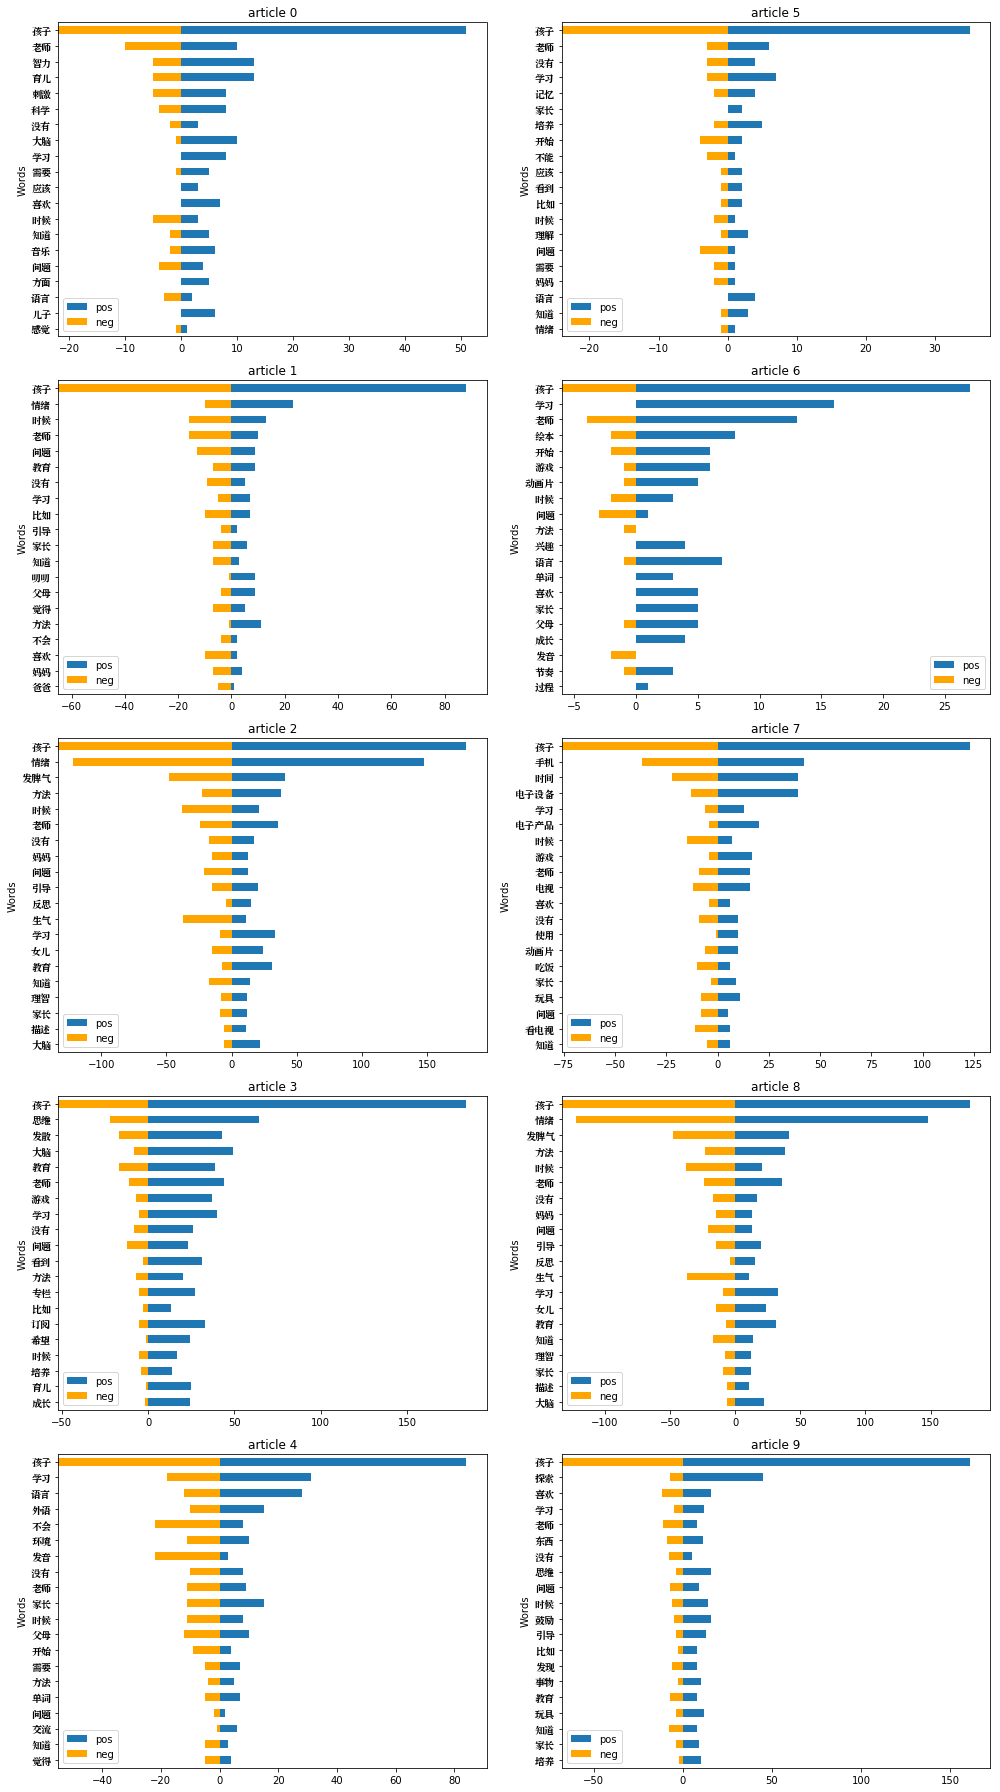

In [524]:
fig,axes = plt.subplots(5,2,figsize = (14,25))
for i in range(5):
    (names["key_word_label_num_%s"%i]["pos"][::-1]).plot.barh(ax=axes[i][0],label = "pos")
    names["key_word_label_num_%s"%i]["neg"][::-1].plot.barh(ax=axes[i][0],color = "orange",label = "neg")
    
    for label in axes[i][0].get_yticklabels(): 
        label.set_fontproperties(font) 
    axes[i][0].set_title("article %s"%i)
    axes[i][0].legend()
    
    (names["key_word_label_num_%s" %(i+5)]["pos"][::-1]).plot.barh(ax=axes[i][1],label = "pos")
    names["key_word_label_num_%s"%(i+5)]["neg"][::-1].plot.barh(ax=axes[i][1],color = "orange",label = "neg")
    
    for label in axes[i][1].get_yticklabels(): 
        label.set_fontproperties(font) 
    axes[i][1].set_title("article %s"%(i+5))
    axes[i][1].legend()

fig.tight_layout()


### 下面是数据分析过程的代码

In [45]:
import numpy as np
import os
import xlrd

In [67]:
import fnmatch

xlsx_names = []
for i in os.listdir("./reviews"):
    if fnmatch.fnmatch(i,"*.xlsx"):
        
        xlsx_names.append("./reviews/" + i) 

In [68]:
xlsx_names

['./reviews/\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x9d\xa0\xe8\xb0\xb1\xe7\x9a\x84\xe6\x99\xba\xe5\x8a\x9b\xe6\x8f\x90\xe5\x8d\x87\xe6\xb3\x95.xlsx',
 './reviews/\xe5\x88\xab\xe7\xbb\x99\xe5\xad\xa9\xe5\xad\x90\xe8\xb4\xb4\xe6\xa0\x87\xe7\xad\xbe.xlsx',
 './reviews/\xe5\x9d\x9a\xe6\x8c\x81\xe8\xbf\x99\xe4\xb8\x89\xe6\xad\xa5\xef\xbc\x8c\xe6\x90\x9e\xe5\xae\x9a\xe5\x8f\x91\xe8\x84\xbe\xe6\xb0\x94\xe7\x9a\x84\xe5\xa8\x83.xlsx',
 './reviews/\xe5\xa4\xa7\xe8\x84\x91\xe6\x9a\x97\xe8\x83\xbd\xe9\x87\x8f\xe6\x89\x93\xe5\xbc\x80\xe5\x88\x9b\xe9\x80\xa0\xe5\x8a\x9b.xlsx',
 './reviews/\xe5\xad\xa9\xe5\xad\x90\xe5\xad\xa6\xe5\xa4\x96\xe8\xaf\xad\xef\xbc\x8c\xe5\xa4\x9a\xe5\xa4\xa7\xe6\x9c\x80\xe5\x90\x88\xe9\x80\x82.xlsx',
 './reviews/\xe5\xad\xa9\xe5\xad\x90\xe6\x8e\xa5\xe5\x8f\x97\xe6\x96\xb0\xe4\xba\x8b\xe7\x89\xa9\xe6\xaf\x94\xe6\x88\x90\xe5\xb9\xb4\xe4\xba\xba\xe5\xbf\xab.xlsx',
 './reviews/\xe6\x95\x99\xe4\xbd\xa0\xe4\xb8\x89\xe6\x8b\x9b\xe4\xba\xb2\xe5\xad\x90\xe6\xb8\xb8\xe6\x88\x8f\xef

In [3]:
def get_reviews(file_name,sheet_index = 0,col_num = 2):
    data = xlrd.open_workbook(file_name)
    review = data.sheet_by_index(sheet_index).col_values(col_num)
    return review

In [4]:
reviews = []
for name in xlsx_names:
    reviews.append(get_reviews(name))


In [9]:
!pip install bosonnlp

In [123]:
from bosonnlp import BosonNLP
nlp = BosonNLP("MAQLXddV.14272.lHIL6kAHzk6s")

In [13]:
sentiments = []
for i in range(len(xlsx_names)):
    for review in reviews[i]:
        sentiments.append(nlp.sentiment(review))

In [16]:
len(sentiments) == sum( len(reviews[i]) for i in range(len(xlsx_names)))

True

In [17]:
labels = []
for i in sentiments_arr:
    if i[0]>i[1]:
        labels.append(1)
    else:
        labels.append(0)

In [18]:
sentiments_arr= np.hstack((np.array(labels).reshape(5111,1),sentiments_arr))

In [19]:
sentiments_arr.shape

(5111, 3)

In [20]:
num_reviews = []
for i in range(len(xlsx_names)):
    num_reviews.append(len(reviews[i]))
    

In [21]:
num_reviews_arr = np.array(num_reviews)

In [22]:
cum_sum = np.cumsum(num_reviews_arr)
sentiment0 = sentiments_arr[:cum_sum[0]]
sentiment1 = sentiments_arr[cum_sum[0]:cum_sum[1]]
sentiment2 = sentiments_arr[cum_sum[1]:cum_sum[2]]
sentiment3 = sentiments_arr[cum_sum[2]:cum_sum[3]]
sentiment4 = sentiments_arr[cum_sum[3]:cum_sum[4]]
sentiment5 = sentiments_arr[cum_sum[4]:cum_sum[5]]
sentiment6 = sentiments_arr[cum_sum[5]:cum_sum[6]]
sentiment7 = sentiments_arr[cum_sum[6]:cum_sum[7]]
sentiment8 = sentiments_arr[cum_sum[7]:cum_sum[8]]
sentiment9 = sentiments_arr[cum_sum[8]:cum_sum[9]]


In [23]:
sentiments_div = [sentiment0,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,
                  sentiment6,sentiment7,sentiment8,sentiment9]

In [24]:
for num in range(10):
    with open("%s_review_sentiments.txt"%num,"w") as outfile:
        for i,j in(zip(reviews[num],sentiments_div[num])):
            outfile.write(str(j))
            outfile.write("".join(i.split()).encode("utf-8"))
            outfile.write("\n")

In [25]:
import pandas as pd

sentiments_ser = pd.Series(sentiments_arr[:,0])
sentiments_ser0 = pd.Series(sentiment0[:,0])
sentiments_ser1 = pd.Series(sentiment1[:,0])
sentiments_ser2 = pd.Series(sentiment2[:,0])
sentiments_ser3 = pd.Series(sentiment3[:,0])
sentiments_ser4 = pd.Series(sentiment4[:,0])
sentiments_ser5 = pd.Series(sentiment5[:,0])
sentiments_ser6 = pd.Series(sentiment6[:,0])
sentiments_ser7 = pd.Series(sentiment7[:,0])
sentiments_ser8 = pd.Series(sentiment8[:,0])
sentiments_ser9 = pd.Series(sentiment9[:,0])

In [26]:
df = pd.DataFrame([sentiments_ser0.value_counts(),sentiments_ser1.value_counts(),
              sentiments_ser2.value_counts(),sentiments_ser3.value_counts(),
              sentiments_ser4.value_counts(),sentiments_ser5.value_counts(),
              sentiments_ser6.value_counts(),sentiments_ser7.value_counts(),
              sentiments_ser8.value_counts(),sentiments_ser9.value_counts()])

In [27]:
df["pos"]=df[1.0]
df["neg"]=df[0.0]

In [28]:
df.drop(0.0,axis = 1).drop(1.0,axis = 1)

,pos,neg
0,144,75
1,194,206
2,544,432
3,694,192
4,195,176
5,86,68
6,91,25
7,308,178
8,544,432
9,343,184


In [29]:
df["sum"] = df["pos"]+df["neg"]

In [30]:
df["pos_per"]=df["pos"]/df["sum"] * 100
df["neg_per"]=df["neg"]/df["sum"] * 100

In [31]:
df

,0.0,1.0,pos,neg,sum,pos_per,neg_per
0,75,144,144,75,219,65.753425,34.246575
1,206,194,194,206,400,48.500000,51.500000
2,432,544,544,432,976,55.737705,44.262295
3,192,694,694,192,886,78.329571,21.670429
4,176,195,195,176,371,52.560647,47.439353
5,68,86,86,68,154,55.844156,44.155844
6,25,91,91,25,116,78.448276,21.551724
7,178,308,308,178,486,63.374486,36.625514
8,432,544,544,432,976,55.737705,44.262295
9,184,343,343,184,527,65.085389,34.914611


In [281]:
import matplotlib.pyplot as plt
%matplotlib inline

### 读取情感指数

In [6]:
with open("reviews_sentiments.txt") as infile:
    sentiments_input = infile.read()

In [8]:
sentiments = []

for i in sentiments_input[2:-2].split("]][["):
    sentiments.append(i.split(","))

In [14]:
sentiments_arr = np.array(sentiments).reshape(5111,2).astype(float)

In [15]:
sentiments_arr

array([[ 0.30040159,  0.69959841],
       [ 0.93361369,  0.06638631],
       [ 0.77837181,  0.22162819],
       ..., 
       [ 0.37971386,  0.62028614],
       [ 0.04459746,  0.95540254],
       [ 0.35042356,  0.64957644]])

### 关键词提取

In [64]:
!pip install jieba

    100% |████████████████████████████████| 7.4MB 6.7kB/s ta 0:00:01
  Running setup.py bdist_wheel for jieba ... - \ | done
  Stored in directory: /Users/jhang/Library/Caches/pip/wheels/fd/8c/07/e495d158d91e11f50c829520f77d20d1f408f18a13cdb15d02
Successfully built jieba


In [278]:
import jieba
import jieba.analyse

In [195]:
# 单个评论的关键词

key_words = []
for i in range(len(xlsx_names)):
    print "processing %d article"%i
    for review in reviews[i]:
        key_words.append(jieba.analyse.textrank(review,topK = 4, withWeight = True ))

processing 0 article
processing 1 article
processing 2 article
processing 3 article
processing 4 article
processing 5 article
processing 6 article
processing 7 article
processing 8 article
processing 9 article


In [362]:
key_words_without_weights = []
for i in range(len(xlsx_names)):
    print "processing %d article"%i
    for review in reviews[i]:
        key_words_without_weights.append(jieba.analyse.textrank(review,topK = 4, withWeight = False ))

processing 0 article
processing 1 article
processing 2 article
processing 3 article
processing 4 article
processing 5 article
processing 6 article
processing 7 article
processing 8 article
processing 9 article


In [533]:
reviews_all = ""
key_words_all = []
for i in range(len(xlsx_names)):
    print "process %d article"%i
    for review in reviews[i]:
        reviews_all += review
    
key_words_all.append(jieba.analyse.textrank(reviews_all,topK = 20, withWeight = True))

process 0 article
process 1 article
process 2 article
process 3 article
process 4 article
process 5 article
process 6 article
process 7 article
process 8 article
process 9 article


In [535]:
df_key_words_all = pd.DataFrame(key_words_all)

In [536]:
df_key_words_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(孩子, 1.0)","(情绪, 0.344399799109)","(老师, 0.171307124457)","(学习, 0.158319984139)","(时候, 0.154940076187)","(没有, 0.144449299512)","(问题, 0.128837125962)","(方法, 0.125884391176)","(教育, 0.110448466248)","(妈妈, 0.0995381428914)","(发脾气, 0.0985331164756)","(家长, 0.0978832909481)","(喜欢, 0.0968303777327)","(知道, 0.0932285648418)","(大脑, 0.0927477577762)","(引导, 0.0925749477428)","(时间, 0.0851306586566)","(需要, 0.084083852559)","(比如, 0.0836357957745)","(女儿, 0.083200698814)"


In [185]:
# 每篇文章的关键词

key_words_article = []
for i in range(len(xlsx_names)):
    print "process %d article"%i
    review_article = ""
    for review in reviews[i]:
        review_article += review
    key_words_article.append(jieba.analyse.textrank(review_article,topK = 20, withWeight = True))

process 0 article
process 1 article
process 2 article
process 3 article
process 4 article
process 5 article
process 6 article
process 7 article
process 8 article
process 9 article


In [199]:
df = df.drop(0.0,axis = 1).drop(1.0,axis = 1)

,pos,neg,sum,pos_per,neg_per
0,144,75,219,65.753425,34.246575
1,194,206,400,48.500000,51.500000
2,544,432,976,55.737705,44.262295
3,694,192,886,78.329571,21.670429
4,195,176,371,52.560647,47.439353
5,86,68,154,55.844156,44.155844
6,91,25,116,78.448276,21.551724
7,308,178,486,63.374486,36.625514
8,544,432,976,55.737705,44.262295
9,343,184,527,65.085389,34.914611


In [311]:
names = locals()
for i in range(10):
    names['df_key_words_%s' % i] = pd.DataFrame(key_words_article[i]) 



In [312]:
for i in range(10):
    names['df_key_words_%s' % i]["Weights"] = names['df_key_words_%s' % i][1]
    names['df_key_words_%s' % i]["Words"] = names['df_key_words_%s' % i][0]
    names['df_key_words_%s' % i] = names['df_key_words_%s' % i].drop(1,axis =1).drop(0,axis = 1)
    names['df_key_words_%s' % i] = names['df_key_words_%s' % i].set_index(names['df_key_words_%s' % i]["Words"])

In [450]:
df_key_words_0.index

Index([u'孩子', u'老师', u'智力', u'育儿', u'刺激', u'科学', u'没有', u'大脑', u'学习', u'需要',
       u'应该', u'喜欢', u'时候', u'知道', u'音乐', u'问题', u'方面', u'语言', u'儿子', u'感觉'],
      dtype='object', name=u'Words')

In [313]:
from matplotlib.font_manager import FontProperties 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 
font = FontProperties(fname=r"/Library/Fonts/Songti.ttc") 

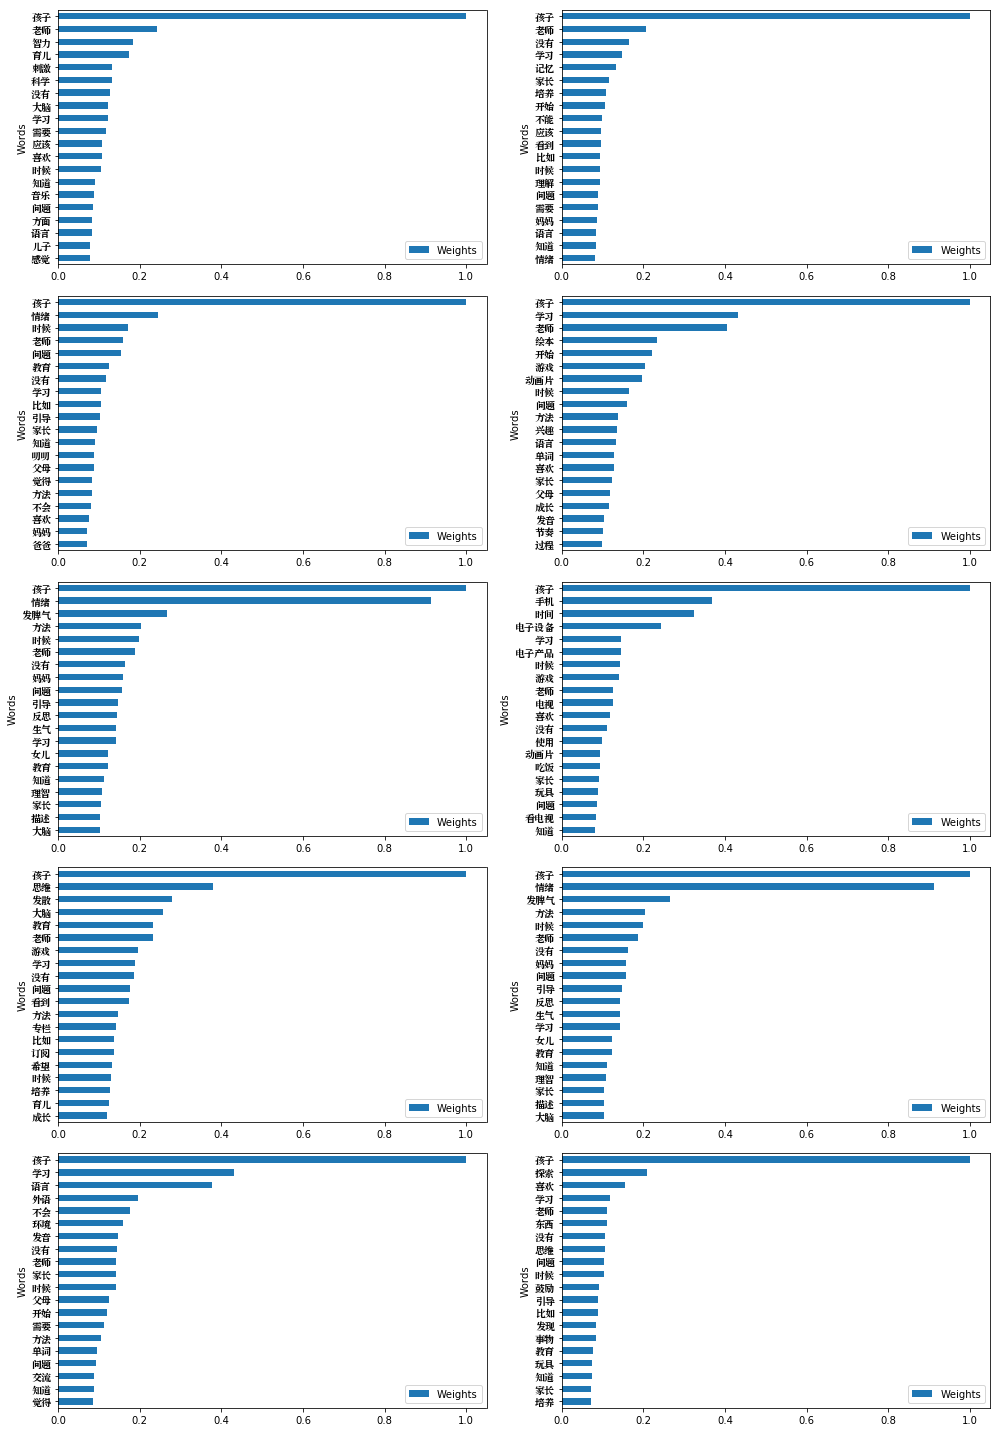

In [322]:
fig, axes = plt.subplots(5,2,figsize=(14,20))
#axes[0][0].bar(df_key_words_0.index[::-1],df_key_words_0[::-1])
for i in range(5):
    names["df_key_words_%s" %i][::-1].plot.barh(ax=axes[i][0])
    for label in axes[i][0].get_yticklabels(): 
        label.set_fontproperties(font) 

    names["df_key_words_%s" %(i+5)][::-1].plot.barh(ax=axes[i][1])
    for label in axes[i][1].get_yticklabels(): 
        label.set_fontproperties(font) 

fig.tight_layout()

In [294]:
!pwd

/Users/jhang/Documents/review_analysis


In [368]:
len(key_words_article)

10

In [337]:
node = np.append(np.zeros([1]),cum_sum).astype(int)
node

array([   0,  219,  619, 1595, 2481, 2852, 3006, 3122, 3608, 4584, 5111])

In [363]:
for i in range(10):
    names["key_word_%s" %i] = key_words_without_weights[node[int(i)]:node[int(i+1)]]

In [411]:
print key_words_article[0][18][0]

儿子


In [419]:
# 每篇文章的 keywords 在该文章的情感分布
for i_art in range(10):
    for i_keyword in range(20):
        names["key_word_label_%s_%s" %(i_art,i_keyword)] = []
        for j, key_word in enumerate(names["key_word_%s" %i_art]):
            if key_words_article[i_art][i_keyword][0] in key_word:
                names["key_word_label_%s_%s" %(i_art,i_keyword)].append(names["sentiments_ser%s" %i_art][j])
             

In [508]:
# 计数正负面
for i_art in range(10):
    for i_keyword in range(20):
        tol = len(names["key_word_label_%s_%s" %(i_art,i_keyword)])
        names["key_word_label_num_%s_%s" %(i_art,i_keyword)] = [(tol - sum(names["key_word_label_%s_%s" %(i_art,i_keyword)])),
                                                                sum(names["key_word_label_%s_%s" %(i_art,i_keyword)])]

In [509]:
key_word_label_num = []
for i_art in range(10):
    for i_keyword in range(20):
        key_word_label_num.append(names["key_word_label_num_%s_%s" %(i_art,i_keyword)])

In [510]:
len(key_word_label_num)

200

In [511]:
for i in range(10):
    names["key_word_label_num_%s" %i] = pd.DataFrame(key_word_label_num[i*20:(i+1)*20]).set_index(names["df_key_words_%s"%i].index)
    names["key_word_label_num_%s" %i]["pos"] = names["key_word_label_num_%s" %i][1]
    names["key_word_label_num_%s" %i]["neg"] = - names["key_word_label_num_%s" %i][0]

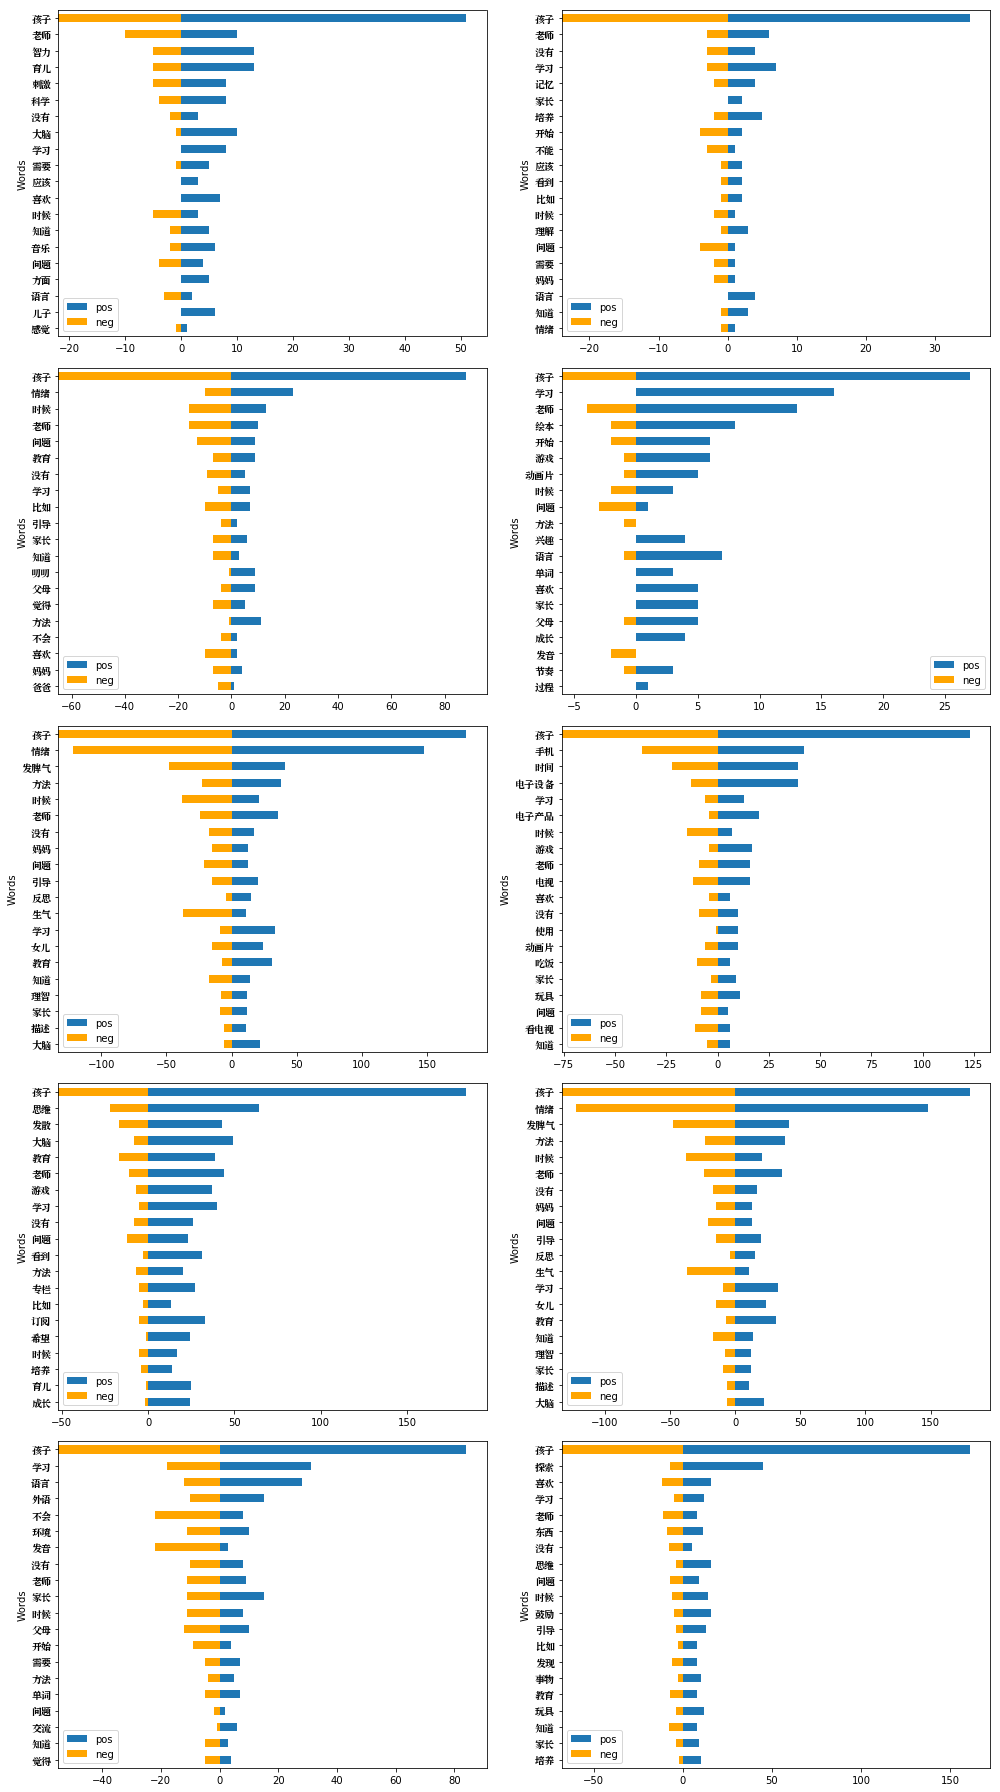

In [516]:
fig,axes = plt.subplots(5,2,figsize = (14,25))
for i in range(5):
    (names["key_word_label_num_%s"%i]["pos"][::-1]).plot.barh(ax=axes[i][0],label = "pos")
    names["key_word_label_num_%s"%i]["neg"][::-1].plot.barh(ax=axes[i][0],color = "orange",label = "neg")
    
    for label in axes[i][0].get_yticklabels(): 
        label.set_fontproperties(font) 
    
    axes[i][0].legend()
    
    (names["key_word_label_num_%s" %(i+5)]["pos"][::-1]).plot.barh(ax=axes[i][1],label = "pos")
    names["key_word_label_num_%s"%(i+5)]["neg"][::-1].plot.barh(ax=axes[i][1],color = "orange",label = "neg")
    
    for label in axes[i][1].get_yticklabels(): 
        label.set_fontproperties(font) 
    
    axes[i][1].legend()

fig.tight_layout()


In [455]:
len(key_word_label_num [0:20])

20

In [464]:
plt.barh?

In [369]:
sentiments_ser0

0      0.0
1      1.0
2      1.0
3      0.0
4      1.0
5      1.0
6      0.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     0.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     0.0
22     1.0
23     0.0
24     0.0
25     1.0
26     1.0
27     0.0
28     0.0
29     1.0
      ... 
189    1.0
190    0.0
191    1.0
192    1.0
193    0.0
194    1.0
195    0.0
196    1.0
197    1.0
198    0.0
199    0.0
200    0.0
201    1.0
202    1.0
203    1.0
204    1.0
205    1.0
206    0.0
207    0.0
208    0.0
209    0.0
210    1.0
211    1.0
212    0.0
213    1.0
214    1.0
215    1.0
216    1.0
217    1.0
218    1.0
dtype: float64